In [1]:
# Bee Demo

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import datetime

In [2]:
#clean up data from openweather

import warnings
warnings.filterwarnings('ignore')


In [3]:
#import csv files

ww_csv = "data/Wurzburg_Weather.csv"

Wurz_df = pd.read_csv(ww_csv, encoding="utf-8")
Wurz_df.head()

sw_csv = "data/Schwartau-Lubeck_Weather.csv"

schwa_df = pd.read_csv(sw_csv, encoding="utf-8")
schwa_df.head()

,Local time in Lubeck / Blankensee (airport),T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td
0,30.05.2019 20:50,17.0,763.6,765.0,77.0,Wind blowing from the south-west,4.0,NaN,NaN,NaN,"Few clouds (10-30%) 420 m, broken clouds (60-9...",10.0 and more,13.0
1,30.05.2019 19:50,18.0,763.6,765.0,73.0,Wind blowing from the south-west,4.0,NaN,NaN,NaN,"Few clouds (10-30%) 510 m, scattered clouds (4...",10.0 and more,13.0
2,30.05.2019 19:20,18.0,763.6,765.0,73.0,Wind blowing from the south-west,5.0,NaN,NaN,NaN,Broken clouds (60-90%) 1410 m,10.0 and more,13.0
3,30.05.2019 18:50,18.0,763.6,765.0,73.0,Wind blowing from the south-west,5.0,NaN,NaN,NaN,Few clouds (10-30%) 990 m,10.0 and more,13.0
4,30.05.2019 18:20,18.0,763.6,765.0,73.0,Wind blowing from the south-west,5.0,NaN,NaN,NaN,"Few clouds (10-30%) 990 m, broken clouds (60-9...",10.0 and more,13.0


In [4]:
#create DF with only relevant data

Wurz_T_U_df = Wurz_df[['Local time in Wurzburg', 'T', 'U']]
Wurz_T_U_df.head()

schwa_T_U_df = schwa_df[['Local time in Lubeck / Blankensee (airport)', 'T', 'U']]
schwa_T_U_df.head()

,Local time in Lubeck / Blankensee (airport),T,U
0,30.05.2019 20:50,17.0,77.0
1,30.05.2019 19:50,18.0,73.0
2,30.05.2019 19:20,18.0,73.0
3,30.05.2019 18:50,18.0,73.0
4,30.05.2019 18:20,18.0,73.0


In [5]:
#clean up headers

Wurz_T_U_df['Date'] = pd.to_datetime(Wurz_T_U_df['Local time in Wurzburg']).dt.date
Wurz_T_U_df['Time'] = pd.to_datetime(Wurz_T_U_df['Local time in Wurzburg']).dt.time
Wurz_T_U_df.head()

schwa_T_U_df['Date'] = pd.to_datetime(schwa_T_U_df['Local time in Lubeck / Blankensee (airport)']).dt.date
schwa_T_U_df['Time'] = pd.to_datetime(schwa_T_U_df['Local time in Lubeck / Blankensee (airport)']).dt.time
schwa_T_U_df.head()

,Local time in Lubeck / Blankensee (airport),T,U,Date,Time
0,30.05.2019 20:50,17.0,77.0,2019-05-30,20:50:00
1,30.05.2019 19:50,18.0,73.0,2019-05-30,19:50:00
2,30.05.2019 19:20,18.0,73.0,2019-05-30,19:20:00
3,30.05.2019 18:50,18.0,73.0,2019-05-30,18:50:00
4,30.05.2019 18:20,18.0,73.0,2019-05-30,18:20:00


In [6]:
#arange headers

Wurz_T_U_D = Wurz_T_U_df[['Date', 'T', 'U']]
Wurz_T_U_D.head()

schwa_T_U_D = schwa_T_U_df[['Date', 'T', 'U']]
schwa_T_U_D.head()

,Date,T,U
0,2019-05-30,17.0,77.0
1,2019-05-30,18.0,73.0
2,2019-05-30,18.0,73.0
3,2019-05-30,18.0,73.0
4,2019-05-30,18.0,73.0


In [7]:
#groupby date

Wurz_Clean = Wurz_T_U_D.groupby(['Date']).mean()
Wurz_Clean.head()

schwa_Clean = schwa_T_U_D.groupby(['Date']).mean()
schwa_Clean.head()

,T,U
Date,,
2017-01-01,5.000000,91.000000
2017-01-02,0.708333,95.416667
2017-01-03,4.714286,80.750000
2017-01-04,15.178571,71.678571
2017-01-05,12.206897,57.172414


In [8]:
#EA: added index True, as date index missing from CSV.
Wurz_Clean.to_csv('Wurzburg_Weather_Cleaned.csv', index=True, header=True)

#EA: added index True, as date index missing from CSV.
schwa_Clean.to_csv('schwartau_Weather_Cleaned.csv', index=True, header=True)

In [9]:


#wurzburg
# File to Load (Remember to change these)
wurz_flow_csv = "data/flow_wurzburg.csv"
wurz_weight_csv = "data/weight_wurzburg.csv"
wurz_temp_csv = "data/temperature_wurzburg.csv"
wurz_humid_csv = "data/humidity_wurzburg.csv"


# Read the hive Data
wurz_flow = pd.read_csv(wurz_flow_csv, parse_dates=['timestamp'], date_parser=pd.to_datetime)
wurz_weight_old = pd.read_csv(wurz_weight_csv, parse_dates=['timestamp'], date_parser=pd.to_datetime)
wurz_temp = pd.read_csv(wurz_temp_csv, parse_dates=['timestamp'], date_parser=pd.to_datetime)
wurz_humid_old = pd.read_csv(wurz_humid_csv, parse_dates=['timestamp'], date_parser=pd.to_datetime)




In [10]:
#Schwartau
# File to Load (Remember to change these)

schwa_flow_csv = "data/flow_schwartau.csv"
schwa_weight_csv = "data/weight_schwartau.csv"
schwa_temp_csv = "data/temperature_schwartau.csv"
schwa_humid_csv = "data/humidity_schwartau.csv"

# Read the hive Data

schwa_flow = pd.read_csv(schwa_flow_csv, parse_dates=['timestamp'], date_parser=pd.to_datetime)
schwa_weight_old = pd.read_csv(schwa_weight_csv, parse_dates=['timestamp'], date_parser=pd.to_datetime)
schwa_temp = pd.read_csv(schwa_temp_csv, parse_dates=['timestamp'], date_parser=pd.to_datetime)
schwa_humid_old = pd.read_csv(schwa_humid_csv, parse_dates=['timestamp'], date_parser=pd.to_datetime)




In [11]:
# fix the negative values showing up the weight and humid files. make new DF by removing any values less than zero


wurz_weight = wurz_weight_old[wurz_weight_old['weight'] > 0]
wurz_humid = wurz_humid_old[wurz_humid_old['humidity'] > 0]
schwa_weight = schwa_weight_old[schwa_weight_old['weight'] > 0]
schwa_humid = schwa_humid_old[schwa_humid_old['humidity'] > 0]


In [12]:
# Wurz
# add a column for day, pull the date from timestamp colummn and populate in day column in each data source used.
# also calculate the following:
# flow sum
# weight mean
# temp mean
# humid mean

pd.DatetimeIndex(wurz_flow.timestamp).normalize()
wurz_flow['day'] = pd.DatetimeIndex(wurz_flow.timestamp).normalize()
wgroup_flow = wurz_flow.groupby("day").sum()

wurz_weight['day'] = pd.DatetimeIndex(wurz_weight.timestamp).normalize()
wgroup_weight = wurz_weight.groupby("day").mean()

wurz_temp['day'] = pd.DatetimeIndex(wurz_temp.timestamp).normalize()
wgroup_temp = wurz_temp.groupby("day").mean()

wurz_humid['day'] = pd.DatetimeIndex(wurz_humid.timestamp).normalize()
wgroup_humid = wurz_humid.groupby("day").mean()

In [13]:
# Schwartau
# add a column for day, pull the date from timestamp colummn and populate in day column in each data source used.
# also calculate the following:
# flow sum
# weight mean
# temp mean
# humid mean

pd.DatetimeIndex(schwa_flow.timestamp).normalize()
schwa_flow['day'] = pd.DatetimeIndex(schwa_flow.timestamp).normalize()
sgroup_flow = schwa_flow.groupby("day").sum()

schwa_weight['day'] = pd.DatetimeIndex(schwa_weight.timestamp).normalize()
sgroup_weight = schwa_weight.groupby("day").mean()

schwa_temp['day'] = pd.DatetimeIndex(schwa_temp.timestamp).normalize()
sgroup_temp = schwa_temp.groupby("day").mean()

schwa_humid['day'] = pd.DatetimeIndex(schwa_humid.timestamp).normalize()
sgroup_humid = schwa_humid.groupby("day").mean()

In [14]:
# Wurz
# Combine the data into a single dataset

wurz_3_df = pd.merge(wgroup_humid, wgroup_temp, on="day", how="inner")
wurz_2_df = pd.merge(wurz_3_df, wgroup_weight, on="day", how="inner")
wurz_hive_df = pd.merge(wurz_2_df, wgroup_flow, on="day", how="inner")

wurz_df = wurz_hive_df.rename(columns={"humidity":"w_humidity",
                                       "temperature":"w_temperature",
                                       "weight":"w_weight",
                                       "flow":"w_flow"})


wurz_df.head()

,w_humidity,w_temperature,w_weight,w_flow
day,,,,
2017-01-01,92.058947,-0.082160,52.661690,-6
2017-01-02,92.794722,1.825578,52.671111,-9
2017-01-03,91.173472,3.082557,52.653767,-7
2017-01-04,91.077917,3.750071,52.610835,-21
2017-01-05,82.656076,2.259225,52.623591,-12


In [15]:
# Schwartau
# Combine the data into a single dataset

schwa_3_df = pd.merge(sgroup_humid, sgroup_temp, on="day", how="inner")
schwa_2_df = pd.merge(schwa_3_df, sgroup_weight, on="day", how="inner")
schwa_hive_df = pd.merge(schwa_2_df, sgroup_flow, on="day", how="inner")

schwa_df = schwa_hive_df.rename(columns={"humidity":"s_humidity",
                                       "temperature":"s_temperature",
                                       "weight":"s_weight",
                                       "flow":"s_flow"})


schwa_df.head()

,s_humidity,s_temperature,s_weight,s_flow
day,,,,
2017-01-01,98.040310,15.477829,50736.790078,-5
2017-01-02,98.806319,13.376389,50657.796250,-22
2017-01-03,98.403472,16.181965,50769.785556,-30
2017-01-04,97.292292,14.724111,50532.602778,-28
2017-01-05,96.583889,9.058442,50109.808194,-11


In [16]:
# merge the hive data for werzberg and shcwartau

ws_df = pd.merge(wurz_df, schwa_df, on="day", how="inner")
ws_df.head()

,w_humidity,w_temperature,w_weight,w_flow,s_humidity,s_temperature,s_weight,s_flow
day,,,,,,,,
2017-01-01,92.058947,-0.082160,52.661690,-6,98.040310,15.477829,50736.790078,-5
2017-01-02,92.794722,1.825578,52.671111,-9,98.806319,13.376389,50657.796250,-22
2017-01-03,91.173472,3.082557,52.653767,-7,98.403472,16.181965,50769.785556,-30
2017-01-04,91.077917,3.750071,52.610835,-21,97.292292,14.724111,50532.602778,-28
2017-01-05,82.656076,2.259225,52.623591,-12,96.583889,9.058442,50109.808194,-11


In [17]:
# Export the combined hive data as a CSV, with the Pandas index and with the header
ws_df.to_csv("ws.csv", index=True, header=True)
ws_df.to_csv("data/ws.csv", index=True, header=True)

In [18]:
#load the hive data and the weather data 

#wurzburg
# File to Load (Remember to change these)
ws_csv = "data/ws.csv"
ww_csv = "data/Wurzburg_Weather_Cleaned.csv"
sc_csv = "data/schwartau_Weather_Cleaned.csv"

# Read the hive Data
ws_df = pd.read_csv(ws_csv)
ww_df = pd.read_csv(ww_csv)
sc_df = pd.read_csv(sc_csv)

ws_df = ws_df.rename(columns={"day":"date"})
ww_df = ww_df.rename(columns={"T":"w_city_temp",
                             "U":"w_city_humid",
                             "Date":"date"})

sc_df = sc_df.rename(columns={"T":"s_city_temp",
                             "U":"s_city_humid",
                             "Date":"date"})

sc_df.head()

,date,s_city_temp,s_city_humid
0,2017-01-01,5.000000,91.000000
1,2017-01-02,0.708333,95.416667
2,2017-01-03,4.714286,80.750000
3,2017-01-04,15.178571,71.678571
4,2017-01-05,12.206897,57.172414


In [19]:
# merge the hive file with the weather files

weather_hive_2_df = pd.merge(ws_df, ww_df, on="date", how="inner")
weather_hive_ws_df = pd.merge(weather_hive_2_df, sc_df, on="date", how="inner")
weather_hive_ws_df.head()

,date,w_humidity,w_temperature,w_weight,w_flow,s_humidity,s_temperature,s_weight,s_flow,w_city_temp,w_city_humid,s_city_temp,s_city_humid
0,2017-01-01,92.058947,-0.082160,52.661690,-6,98.040310,15.477829,50736.790078,-5,-5.145833,95.250000,5.000000,91.000000
1,2017-01-02,92.794722,1.825578,52.671111,-9,98.806319,13.376389,50657.796250,-22,1.583333,86.208333,0.708333,95.416667
2,2017-01-03,91.173472,3.082557,52.653767,-7,98.403472,16.181965,50769.785556,-30,5.220833,80.083333,4.714286,80.750000
3,2017-01-04,91.077917,3.750071,52.610835,-21,97.292292,14.724111,50532.602778,-28,14.466667,59.083333,15.178571,71.678571
4,2017-01-05,82.656076,2.259225,52.623591,-12,96.583889,9.058442,50109.808194,-11,8.235000,74.350000,12.206897,57.172414


In [20]:
# Export the merged weather and hive data as a CSV, with the Pandas index and with the header
weather_hive_ws_df.to_csv("weather_hive_ws.csv", index=True, header=True)
weather_hive_ws_df.to_csv("data/weather_hive_ws.csv", index=True, header=True)

In [21]:
# load the combined weather had hive file and begin condensing to a monthly average

#wurzburg
# File to Load (Remember to change these)
weather_hive_ws_csv = "data/weather_hive_ws.csv"


# Read the hive Data
weather_hive_ws = pd.read_csv(weather_hive_ws_csv, parse_dates=['date'], date_parser=pd.to_datetime, index_col=0)

weather_hive_ws.dtypes

date             datetime64[ns]
w_humidity              float64
w_temperature           float64
w_weight                float64
w_flow                    int64
s_humidity              float64
s_temperature           float64
s_weight                float64
s_flow                    int64
w_city_temp             float64
w_city_humid            float64
s_city_temp             float64
s_city_humid            float64
dtype: object

In [22]:
weather_hive_ws.head()

,date,w_humidity,w_temperature,w_weight,w_flow,s_humidity,s_temperature,s_weight,s_flow,w_city_temp,w_city_humid,s_city_temp,s_city_humid
0,2017-01-01,92.058947,-0.082160,52.661690,-6,98.040310,15.477829,50736.790078,-5,-5.145833,95.250000,5.000000,91.000000
1,2017-01-02,92.794722,1.825578,52.671111,-9,98.806319,13.376389,50657.796250,-22,1.583333,86.208333,0.708333,95.416667
2,2017-01-03,91.173472,3.082557,52.653767,-7,98.403472,16.181965,50769.785556,-30,5.220833,80.083333,4.714286,80.750000
3,2017-01-04,91.077917,3.750071,52.610835,-21,97.292292,14.724111,50532.602778,-28,14.466667,59.083333,15.178571,71.678571
4,2017-01-05,82.656076,2.259225,52.623591,-12,96.583889,9.058442,50109.808194,-11,8.235000,74.350000,12.206897,57.172414


In [23]:
#set the index back to the date column

weather_hive_ws = weather_hive_ws.set_index("date")
weather_hive_ws.head()

,w_humidity,w_temperature,w_weight,w_flow,s_humidity,s_temperature,s_weight,s_flow,w_city_temp,w_city_humid,s_city_temp,s_city_humid
date,,,,,,,,,,,,
2017-01-01,92.058947,-0.082160,52.661690,-6,98.040310,15.477829,50736.790078,-5,-5.145833,95.250000,5.000000,91.000000
2017-01-02,92.794722,1.825578,52.671111,-9,98.806319,13.376389,50657.796250,-22,1.583333,86.208333,0.708333,95.416667
2017-01-03,91.173472,3.082557,52.653767,-7,98.403472,16.181965,50769.785556,-30,5.220833,80.083333,4.714286,80.750000
2017-01-04,91.077917,3.750071,52.610835,-21,97.292292,14.724111,50532.602778,-28,14.466667,59.083333,15.178571,71.678571
2017-01-05,82.656076,2.259225,52.623591,-12,96.583889,9.058442,50109.808194,-11,8.235000,74.350000,12.206897,57.172414


In [24]:
#trying to groupby month in the date column. used grouper

month_avg_weather_hive_ws = weather_hive_ws.groupby(pd.Grouper(freq='M')).mean()
month_avg_weather_hive_ws.head()

,w_humidity,w_temperature,w_weight,w_flow,s_humidity,s_temperature,s_weight,s_flow,w_city_temp,w_city_humid,s_city_temp,s_city_humid
date,,,,,,,,,,,,
2017-01-31,88.924949,4.132509,52.123729,-29.166667,97.477295,10.197422,50215.159135,-19.600000,2.214264,78.650133,5.018011,85.150617
2017-02-28,86.739573,11.556415,49.996432,-169.300000,90.810861,13.598453,49183.048264,-36.300000,4.788542,79.706250,4.777360,83.709077
2017-03-31,80.167109,16.008629,48.708102,-1272.612903,94.620217,21.401484,47667.159922,276.580645,9.816964,73.816195,10.195906,73.615292
2017-04-30,86.295250,22.659330,49.585359,-1681.166667,92.788956,33.640373,50097.460384,-431.900000,8.589727,71.858361,8.791624,73.626336
2017-05-31,65.102136,27.104621,56.683475,-4814.903226,76.889198,34.737434,63299.941965,2064.516129,14.959140,72.080645,15.309315,72.582105


In [29]:
# Extracting just Month and Year from Pandas Datetime column


month_avg_weather_hive_ws['month_year'] = pd.to_datetime(month_avg_weather_hive_ws.index).to_period('M')
month_avg_weather_hive_ws.head()

,w_humidity,w_temperature,w_weight,w_flow,s_humidity,s_temperature,s_weight,s_flow,w_city_temp,w_city_humid,s_city_temp,s_city_humid,month_year
date,,,,,,,,,,,,,
2017-01-31,88.924949,4.132509,52.123729,-29.166667,97.477295,10.197422,50215.159135,-19.600000,2.214264,78.650133,5.018011,85.150617,2017-01
2017-02-28,86.739573,11.556415,49.996432,-169.300000,90.810861,13.598453,49183.048264,-36.300000,4.788542,79.706250,4.777360,83.709077,2017-02
2017-03-31,80.167109,16.008629,48.708102,-1272.612903,94.620217,21.401484,47667.159922,276.580645,9.816964,73.816195,10.195906,73.615292,2017-03
2017-04-30,86.295250,22.659330,49.585359,-1681.166667,92.788956,33.640373,50097.460384,-431.900000,8.589727,71.858361,8.791624,73.626336,2017-04
2017-05-31,65.102136,27.104621,56.683475,-4814.903226,76.889198,34.737434,63299.941965,2064.516129,14.959140,72.080645,15.309315,72.582105,2017-05


In [26]:
# set the index to the month_year column

month_summary = month_avg_weather_hive_ws.set_index("month_year")
month_summary.head()

,w_humidity,w_temperature,w_weight,w_flow,s_humidity,s_temperature,s_weight,s_flow,w_city_temp,w_city_humid,s_city_temp,s_city_humid
month_year,,,,,,,,,,,,
2017-01,88.924949,4.132509,52.123729,-29.166667,97.477295,10.197422,50215.159135,-19.600000,2.214264,78.650133,5.018011,85.150617
2017-02,86.739573,11.556415,49.996432,-169.300000,90.810861,13.598453,49183.048264,-36.300000,4.788542,79.706250,4.777360,83.709077
2017-03,80.167109,16.008629,48.708102,-1272.612903,94.620217,21.401484,47667.159922,276.580645,9.816964,73.816195,10.195906,73.615292
2017-04,86.295250,22.659330,49.585359,-1681.166667,92.788956,33.640373,50097.460384,-431.900000,8.589727,71.858361,8.791624,73.626336
2017-05,65.102136,27.104621,56.683475,-4814.903226,76.889198,34.737434,63299.941965,2064.516129,14.959140,72.080645,15.309315,72.582105


In [28]:
# Export file as a CSV, with the Pandas index and with the header....
#month_summary.to_csv("month_summary.csv", index=True, header=True)
#month_summary.to_csv("data/month_summary.csv", index=True, header=True)

In [41]:
#month_summary.dtypes
#month_summary.reset_index()
#month_summary['Year'] = month_summary['month_year'].dt.year
#month_summary['Month'] = month_summary['month_year'].dt.month
#month_summary.head()
#month_summary['Year']=[d.split('-')[0] for d in month_summary.month_year]
#month_summary['Month']=[d.split('-')[1] for d in month_summary.month_year]
#month_summary.head()

In [47]:
#month_summary.plot.scatter(x='w_city_temp', y='w_temperature', c='blue')
#plt.show()

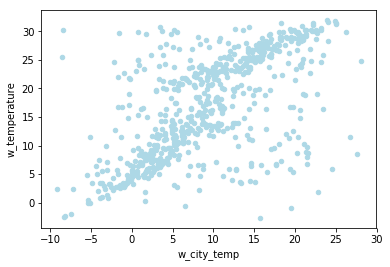

In [43]:
weather_hive_ws.plot.scatter(x='w_city_temp', y='w_temperature', c='lightblue')
plt.show()

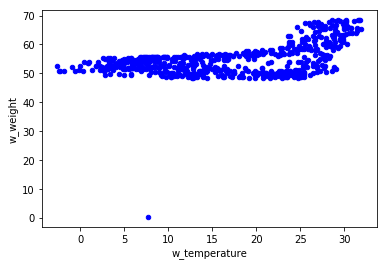

In [48]:
weather_hive_ws.plot.scatter(x='w_temperature', y='w_weight', c='blue')
plt.show()

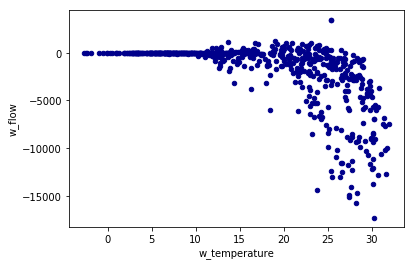

In [49]:
weather_hive_ws.plot.scatter(x='w_temperature', y='w_flow', c='darkblue')
plt.show()

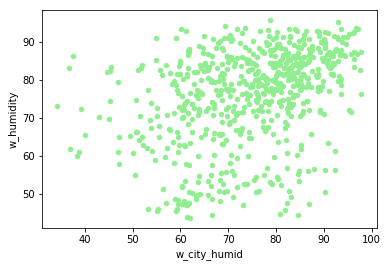

In [50]:
weather_hive_ws.plot.scatter(x='w_city_humid', y='w_humidity', c='lightgreen')
plt.show()

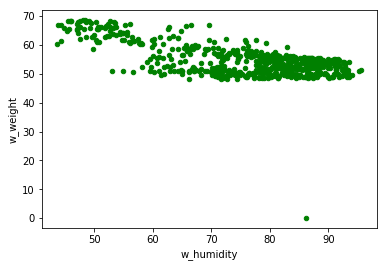

In [51]:
weather_hive_ws.plot.scatter(x='w_humidity', y='w_weight', c='green')
plt.show()

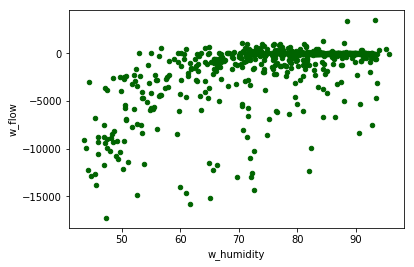

In [53]:
weather_hive_ws.plot.scatter(x='w_humidity', y='w_flow', c='darkgreen')
plt.show()

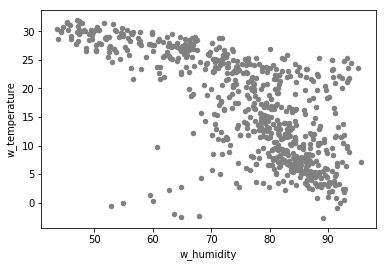

In [54]:
weather_hive_ws.plot.scatter(x='w_humidity', y='w_temperature', c='grey')
plt.show()

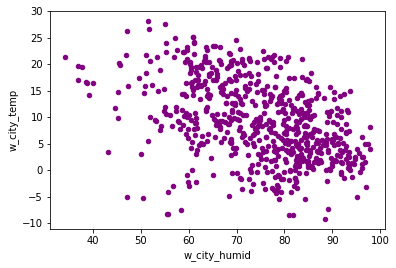

In [56]:
weather_hive_ws.plot.scatter(x='w_city_humid', y='w_city_temp', c='purple')
plt.show()